In [ ]:
#Social_Network_Ads.csv

**Importing the libraries**

In [10]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.tree import DecisionTreeClassifier 
from sklearn.metrics import confusion_matrix, classification_report, accuracy_score, roc_auc_score, plot_roc_curve
from sklearn import tree

**Importing the dataset**

In [2]:
df = pd.read_csv("Social_Network_Ads.csv")
df.head

<bound method NDFrame.head of       User ID  Gender  Age  EstimatedSalary  Purchased
0    15624510    Male   19            19000          0
1    15810944    Male   35            20000          0
2    15668575  Female   26            43000          0
3    15603246  Female   27            57000          0
4    15804002    Male   19            76000          0
..        ...     ...  ...              ...        ...
395  15691863  Female   46            41000          1
396  15706071    Male   51            23000          1
397  15654296  Female   50            20000          1
398  15755018    Male   36            33000          0
399  15594041  Female   49            36000          1

[400 rows x 5 columns]>

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 400 entries, 0 to 399
Data columns (total 5 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   User ID          400 non-null    int64 
 1   Gender           400 non-null    object
 2   Age              400 non-null    int64 
 3   EstimatedSalary  400 non-null    int64 
 4   Purchased        400 non-null    int64 
dtypes: int64(4), object(1)
memory usage: 15.8+ KB


In [4]:
df.drop_duplicates

<bound method DataFrame.drop_duplicates of       User ID  Gender  Age  EstimatedSalary  Purchased
0    15624510    Male   19            19000          0
1    15810944    Male   35            20000          0
2    15668575  Female   26            43000          0
3    15603246  Female   27            57000          0
4    15804002    Male   19            76000          0
..        ...     ...  ...              ...        ...
395  15691863  Female   46            41000          1
396  15706071    Male   51            23000          1
397  15654296  Female   50            20000          1
398  15755018    Male   36            33000          0
399  15594041  Female   49            36000          1

[400 rows x 5 columns]>

In [7]:
df.describe()

,User ID,Age,EstimatedSalary,Purchased
count,4.000000e+02,400.000000,400.000000,400.000000
mean,1.569154e+07,37.655000,69742.500000,0.357500
std,7.165832e+04,10.482877,34096.960282,0.479864
min,1.556669e+07,18.000000,15000.000000,0.000000
25%,1.562676e+07,29.750000,43000.000000,0.000000
50%,1.569434e+07,37.000000,70000.000000,0.000000
75%,1.575036e+07,46.000000,88000.000000,1.000000
max,1.581524e+07,60.000000,150000.000000,1.000000


In [12]:
from sklearn import preprocessing
df["Gender"] = df[["Gender"]].apply(preprocessing.LabelEncoder().fit_transform)

In [13]:
df = df.drop(columns="User ID")
df

,Gender,Age,EstimatedSalary,Purchased
0,1,19,19000,0
1,1,35,20000,0
2,0,26,43000,0
3,0,27,57000,0
4,1,19,76000,0
...,...,...,...,...
395,0,46,41000,1
396,1,51,23000,1
397,0,50,20000,1
398,1,36,33000,0


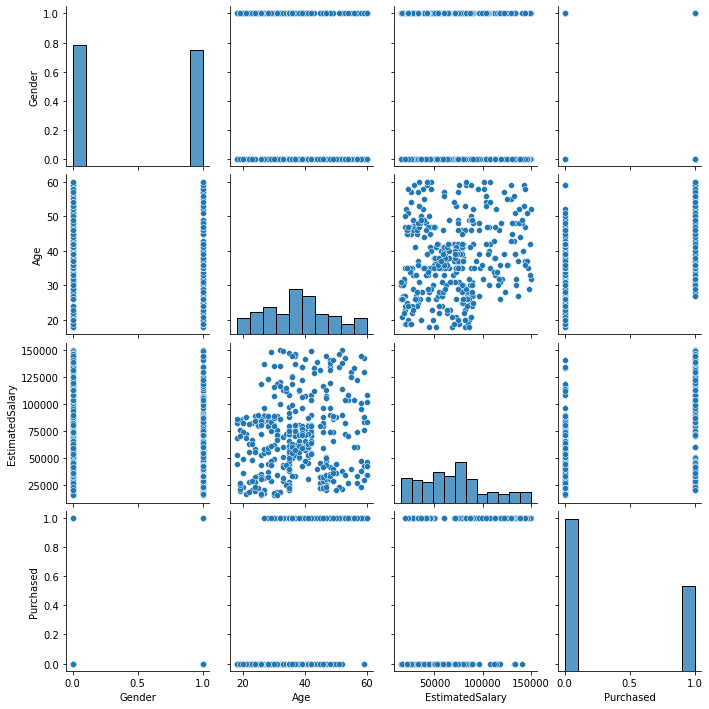

In [14]:
sns.pairplot(df)

In [15]:
X = df.drop(columns="Purchased")
X

,Gender,Age,EstimatedSalary
0,1,19,19000
1,1,35,20000
2,0,26,43000
3,0,27,57000
4,1,19,76000
...,...,...,...
395,0,46,41000
396,1,51,23000
397,0,50,20000
398,1,36,33000


In [16]:
y = df["Purchased"]
y

0      0
1      0
2      0
3      0
4      0
      ..
395    1
396    1
397    1
398    0
399    1
Name: Purchased, Length: 400, dtype: int64

##Splitting the dataset into the Training set and Test set

```
# This is formatted as code
```



In [17]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=7)
print("X_train :",X_train.shape)
print("X_test : ",X_test.shape)
print("y_train :", y_train.shape)
print("y_test :", y_test.shape)

X_train : (320, 3)
X_test :  (80, 3)
y_train : (320,)
y_test : (80,)


**Feature Scaling**

In [20]:
from sklearn.preprocessing import StandardScaler 
scalar = StandardScaler()
scalar.fit(X_train)
X_train_scaled = scalar.transform(X_train)
X_test_scaled = scalar.transform(X_test)

**Fitting Decision Tree Classification to the Training set**

In [21]:
from sklearn.tree import DecisionTreeClassifier

# Instantiate a DecisionTreeClassifier 'dt' with a maximum depth
dt = DecisionTreeClassifier(max_depth=2)

# fit dt to the training set
dt.fit(X_train, y_train)

DecisionTreeClassifier(max_depth=2)

**Predicting the Test set results**

In [22]:
y_pred = dt.predict(X_test)
y_pred

array([1, 0, 0, 0, 0, 1, 1, 0, 1, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0,
       1, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 1, 0, 0, 0, 0, 0,
       0, 1, 0, 0, 0, 0, 0, 1, 1, 0, 1, 1, 1, 0, 0, 0, 0, 1, 0, 1, 0, 0,
       0, 1, 0, 1, 1, 0, 0, 1, 0, 0, 1, 1, 0, 0])

**Making the Confusion Matrix**

In [24]:
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, y_pred)
print('confusion matrix\n',cm)

confusion matrix
 [[50  4]
 [ 2 24]]


In [25]:
from sklearn.metrics import classification_report
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.96      0.93      0.94        54
           1       0.86      0.92      0.89        26

    accuracy                           0.93        80
   macro avg       0.91      0.92      0.92        80
weighted avg       0.93      0.93      0.93        80



Test set accuracy :  0.93
Train set auc : 0.92


/usr/local/lib/python3.8/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_roc_curve is deprecated; Function :func:`plot_roc_curve` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: :meth:`sklearn.metric.RocCurveDisplay.from_predictions` or :meth:`sklearn.metric.RocCurveDisplay.from_estimator`.
  warnings.warn(msg, category=FutureWarning)


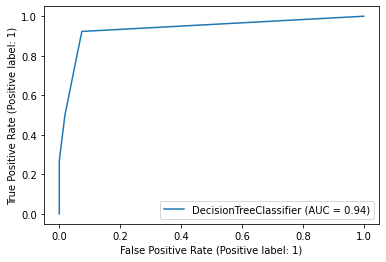

In [26]:
from sklearn.metrics import accuracy_score, roc_auc_score, plot_roc_curve
# we compute the evaluation metric on test/validation set only primarily

# predict test set labels
y_pred = dt.predict(X_test)

# compute test set accuracy
acc = accuracy_score(y_test, y_pred)
print("Test set accuracy :  {:.2f}".format(acc))
acc = roc_auc_score(y_test, y_pred)
print("Train set auc : {:.2f}".format(acc))
plot_roc_curve(dt, X_test, y_test)

**Visualising the Training set results**

[Text(0.5, 0.8333333333333334, 'X[1] <= 44.5\ngini = 0.464\nsamples = 320\nvalue = [203, 117]'),
 Text(0.25, 0.5, 'X[2] <= 91500.0\ngini = 0.292\nsamples = 231\nvalue = [190, 41]'),
 Text(0.125, 0.16666666666666666, 'gini = 0.08\nsamples = 191\nvalue = [183, 8]'),
 Text(0.375, 0.16666666666666666, 'gini = 0.289\nsamples = 40\nvalue = [7, 33]'),
 Text(0.75, 0.5, 'X[2] <= 41500.0\ngini = 0.249\nsamples = 89\nvalue = [13, 76]'),
 Text(0.625, 0.16666666666666666, 'gini = 0.062\nsamples = 31\nvalue = [1, 30]'),
 Text(0.875, 0.16666666666666666, 'gini = 0.328\nsamples = 58\nvalue = [12, 46]')]

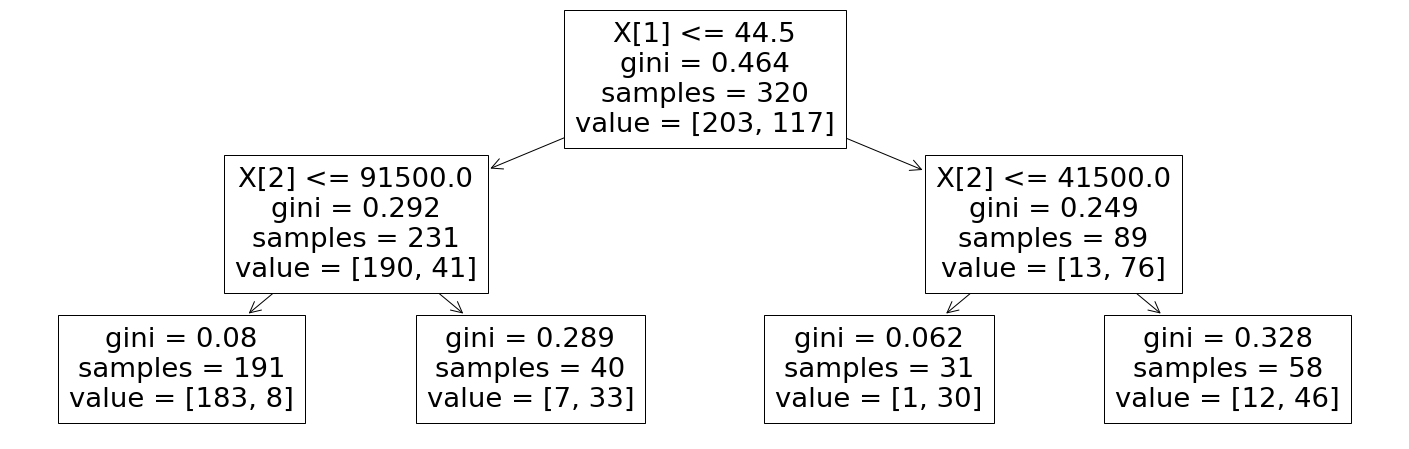

In [27]:
import matplotlib.pyplot as plt
plt.figure(figsize=(25,8))

from sklearn import tree
tree.plot_tree(dt.fit(X_train, y_train))

**Visualising the Test set results**

[Text(0.5, 0.8333333333333334, 'X[1] <= 42.5\ngini = 0.439\nsamples = 80\nvalue = [54, 26]'),
 Text(0.25, 0.5, 'X[2] <= 90000.0\ngini = 0.212\nsamples = 58\nvalue = [51, 7]'),
 Text(0.125, 0.16666666666666666, 'gini = 0.038\nsamples = 51\nvalue = [50, 1]'),
 Text(0.375, 0.16666666666666666, 'gini = 0.245\nsamples = 7\nvalue = [1, 6]'),
 Text(0.75, 0.5, 'X[2] <= 62500.0\ngini = 0.236\nsamples = 22\nvalue = [3, 19]'),
 Text(0.625, 0.16666666666666666, 'gini = 0.0\nsamples = 10\nvalue = [0, 10]'),
 Text(0.875, 0.16666666666666666, 'gini = 0.375\nsamples = 12\nvalue = [3, 9]')]

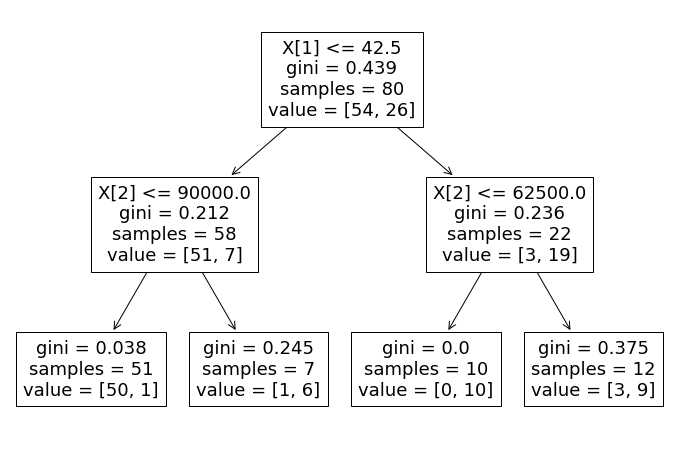

In [29]:
# import matplotlib.pyplot as plt
plt.figure(figsize=(12,8))

# from sklearn import tree

tree.plot_tree(dt.fit(X_test, y_test))

In [30]:

clf_en = DecisionTreeClassifier(criterion='entropy', max_depth=2, random_state=0)


# fit the model
clf_en.fit(X_train, y_train)

DecisionTreeClassifier(criterion='entropy', max_depth=2, random_state=0)

In [32]:

y_pred_en = clf_en.predict(X_test)

In [34]:
# from sklearn.metrics import accuracy_score

print('Model accuracy score with criterion entropy: {0:0.4f}'. format(accuracy_score(y_test, y_pred_en)))
     

Model accuracy score with criterion entropy: 0.9250


In [35]:
y_pred_train_en = clf_en.predict(X_train)

y_pred_train_en

array([1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 1, 0,
       0, 1, 0, 1, 0, 0, 0, 1, 1, 0, 0, 0, 0, 1, 0, 1, 0, 1, 1, 1, 0, 0,
       0, 1, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 0, 0, 0, 1,
       1, 0, 0, 1, 1, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 0, 0,
       0, 0, 1, 1, 1, 0, 1, 0, 0, 1, 1, 1, 0, 1, 0, 1, 1, 0, 0, 0, 1, 1,
       0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 0, 0, 1, 1, 1, 1, 0, 1, 0,
       0, 1, 1, 0, 1, 0, 1, 1, 0, 1, 0, 0, 0, 1, 1, 1, 1, 0, 1, 1, 0, 1,
       0, 1, 1, 1, 1, 0, 0, 0, 0, 1, 1, 1, 1, 0, 1, 0, 0, 1, 1, 0, 0, 0,
       0, 1, 1, 0, 0, 0, 1, 0, 1, 1, 0, 1, 0, 1, 1, 0, 1, 0, 0, 1, 1, 0,
       0, 0, 1, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0,
       0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0,
       0, 1, 0, 0, 0, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 1, 1, 1, 0, 0,
       1, 1, 0, 0, 1, 1, 0, 1, 0, 1, 0, 0, 0, 0, 1, 1, 0, 1, 1, 0, 0, 1,
       1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1,

In [37]:
print('Training-set accuracy score: {0:0.4f}'. format(accuracy_score(y_train, y_pred_train_en)))
     

Training-set accuracy score: 0.9125


In [39]:
print('Training set score: {:.4f}'.format(clf_en.score(X_train, y_train)))

print('Test set score: {:.4f}'.format(clf_en.score(X_test, y_test)))

Training set score: 0.9125
Test set score: 0.9250


[Text(0.5, 0.8333333333333334, 'X[1] <= 42.5\nentropy = 0.91\nsamples = 80\nvalue = [54, 26]'),
 Text(0.25, 0.5, 'X[2] <= 90000.0\nentropy = 0.531\nsamples = 58\nvalue = [51, 7]'),
 Text(0.125, 0.16666666666666666, 'entropy = 0.139\nsamples = 51\nvalue = [50, 1]'),
 Text(0.375, 0.16666666666666666, 'entropy = 0.592\nsamples = 7\nvalue = [1, 6]'),
 Text(0.75, 0.5, 'X[2] <= 62500.0\nentropy = 0.575\nsamples = 22\nvalue = [3, 19]'),
 Text(0.625, 0.16666666666666666, 'entropy = 0.0\nsamples = 10\nvalue = [0, 10]'),
 Text(0.875, 0.16666666666666666, 'entropy = 0.811\nsamples = 12\nvalue = [3, 9]')]

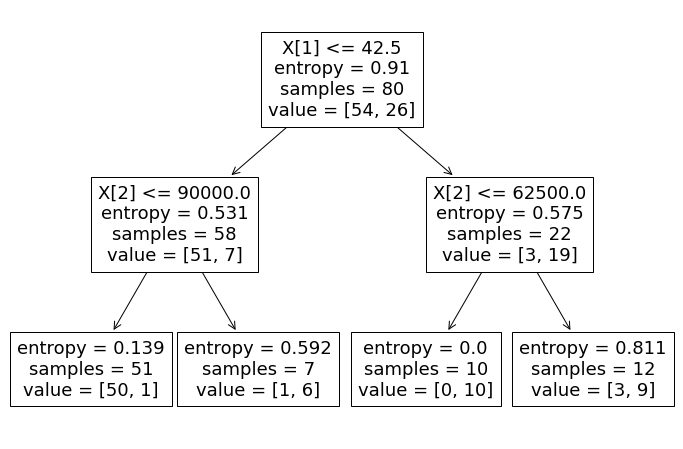

In [41]:
# import matplotlib.pyplot as plt
plt.figure(figsize=(12,8))

# from sklearn import tree

tree.plot_tree(clf_en.fit(X_test, y_test))

[Text(0.5, 0.8333333333333334, 'X[1] <= 44.5\nentropy = 0.947\nsamples = 320\nvalue = [203, 117]'),
 Text(0.25, 0.5, 'X[2] <= 91500.0\nentropy = 0.675\nsamples = 231\nvalue = [190, 41]'),
 Text(0.125, 0.16666666666666666, 'entropy = 0.251\nsamples = 191\nvalue = [183, 8]'),
 Text(0.375, 0.16666666666666666, 'entropy = 0.669\nsamples = 40\nvalue = [7, 33]'),
 Text(0.75, 0.5, 'X[2] <= 41500.0\nentropy = 0.6\nsamples = 89\nvalue = [13, 76]'),
 Text(0.625, 0.16666666666666666, 'entropy = 0.206\nsamples = 31\nvalue = [1, 30]'),
 Text(0.875, 0.16666666666666666, 'entropy = 0.736\nsamples = 58\nvalue = [12, 46]')]

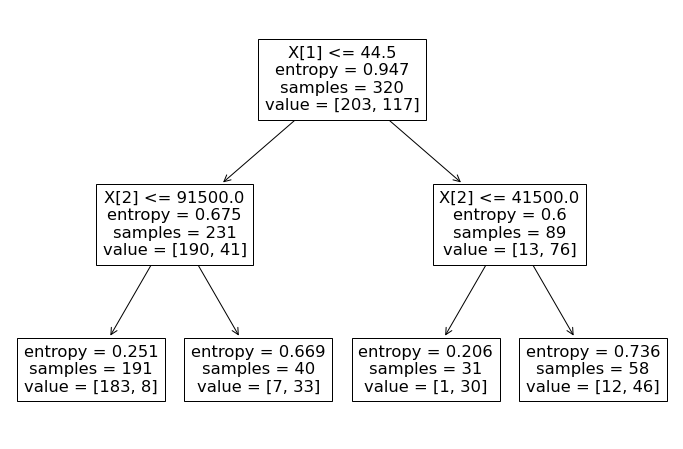

In [42]:
# import matplotlib.pyplot as plt
plt.figure(figsize=(12,8))

# from sklearn import tree

tree.plot_tree(clf_en.fit(X_train, y_train))